# Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing the Dataset from the above link.

In [24]:
dataset = pd.read_csv('movie_metadata.csv') 
print(dataset)

      color      director_name  ...  aspect_ratio  movie_facebook_likes
0     Color      James Cameron  ...          1.78                 33000
1     Color     Gore Verbinski  ...          2.35                     0
2     Color         Sam Mendes  ...          2.35                 85000
3     Color  Christopher Nolan  ...          2.35                164000
4       NaN        Doug Walker  ...           NaN                     0
...     ...                ...  ...           ...                   ...
5038  Color        Scott Smith  ...           NaN                    84
5039  Color                NaN  ...         16.00                 32000
5040  Color   Benjamin Roberds  ...           NaN                    16
5041  Color        Daniel Hsia  ...          2.35                   660
5042  Color           Jon Gunn  ...          1.85                   456

[5043 rows x 28 columns]


# Use the necessary function to handling the missing data



In [25]:
from sklearn.impute import SimpleImputer 
X = dataset.iloc[:, 2:3].values 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(X[:, :1])
X[:, :1] = imputer.transform(X[:, :1])
print(X)

[[723.]
 [302.]
 [602.]
 ...
 [ 13.]
 [ 14.]
 [ 43.]]


# Perform data visualizations using matplotlib or seaborn libraries.

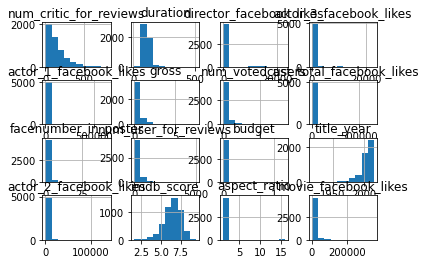

In [34]:
import matplotlib.pyplot as plt
dataset.hist()
plt.show()

# Use the necessary function for handling of categorical data if any


In [27]:
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv('movie_metadata.csv')
print(dataset.head())
labelEncoder = LabelEncoder()
labelEncoder.fit(dataset['movie_facebook_likes'])
d = labelEncoder.transform(dataset['movie_facebook_likes'])
print(d)

   color      director_name  ...  aspect_ratio  movie_facebook_likes
0  Color      James Cameron  ...          1.78                 33000
1  Color     Gore Verbinski  ...          2.35                     0
2  Color         Sam Mendes  ...          2.35                 85000
3  Color  Christopher Nolan  ...          2.35                164000
4    NaN        Doug Walker  ...           NaN                     0

[5 rows x 28 columns]
[781   0 831 ...  13 523 379]


# Splitting the dataset into training and testing datasets


In [28]:
from sklearn.model_selection import train_test_split # used for splitting training and testing data
X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
Y = dataset.iloc[:, -1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train, X_test, Y_train, Y_test)

[['Color' 'Gregory Poirier' 75.0 ... 660.0 5.3 1.85]
 ['Color' 'Michael Bay' 122.0 ... 2000.0 7.4 2.35]
 ['Color' 'John Schultz' 82.0 ... 701.0 5.4 1.85]
 ...
 ['Color' 'Drew Goddard' 634.0 ... 821.0 7.0 2.35]
 ['Color' 'Tom Hooper' 479.0 ... 1000.0 8.0 1.85]
 ['Color' 'Khalil Sullins' 17.0 ... 134.0 5.6 2.35]] [['Color' 'Leos Carax' 332.0 ... 227.0 7.1 1.85]
 ['Color' 'Stephen Gaghan' 358.0 ... 903.0 7.0 2.35]
 ['Color' 'Bruce McCulloch' 52.0 ... 637.0 5.1 1.85]
 ...
 ['Color' 'Kate Connor' 8.0 ... 902.0 5.9 nan]
 ['Color' 'Rob Cohen' 60.0 ... 663.0 6.4 2.35]
 ['Color' 'Mike Mitchell' 226.0 ... 225.0 6.4 2.35]] [  449 51000   916 ... 66000 64000   708] [12000     0   215 ...   348     0     0]


# Perform feature Scaling


In [30]:
dataset.head()
  
x = dataset.iloc[:, 2:3].values
print ("\nOriginal data values : \n",  x)
 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


Original data values : 
 [[723.]
 [302.]
 [602.]
 ...
 [ 13.]
 [ 14.]
 [ 43.]]

After min max Scaling : 
 [[0.88916256]
 [0.37068966]
 [0.74014778]
 ...
 [0.01477833]
 [0.01600985]
 [0.05172414]]

After Standardisation : 
 [[ 4.79322425]
 [ 1.33075415]
 [ 3.79807251]
 ...
 [-1.04609588]
 [-1.03787148]
 [-0.79936404]]


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     4993 non-null   float64
 1   duration                   5028 non-null   float64
 2   director_facebook_likes    4939 non-null   float64
 3   actor_3_facebook_likes     5020 non-null   float64
 4   actor_2_name               5030 non-null   object 
 5   actor_1_facebook_likes     5036 non-null   float64
 6   gross                      4159 non-null   float64
 7   genres                     5043 non-null   object 
 8   actor_1_name               5036 non-null   object 
 9   movie_title                5043 non-null   object 
 10  num_voted_users            5043 non-null   int64  
 11  cast_total_facebook_likes  5043 non-null   int64  
 12  actor_3_name               5020 non-null   object 
 13  facenumber_in_poster       5030 non-null   float

In [32]:
dataset.drop(['color','director_name'],axis=1,inplace=True)
dataset

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
